# Nuages de mots

## Imports et stopwords

In [181]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "rue", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het","autre", "jusqu", "ville", "rossel", "brux", "bruxelles", 
       "Bruxelles", "des", "du", "tÃ©l"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [183]:
# Choisir une année
year = 1968

In [184]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
# txts

In [185]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [186]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [187]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [188]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1968_clean.txt!'

## Nuage de mots

### Afficher les termes les plus fréquents


In [189]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('tél', 1631), ('app', 816), ('ans', 723), ('prix', 698), ('dem', 553), ('part', 496), ('très', 455), ('gar', 438), ('place', 436), ('soir', 422), ('grand', 416), ('terr', 413), ('heures', 397), ('cuis', 357), ('agence', 355), ('ecrire', 353), ('avenue', 342), ('service', 331), ('saint', 310), ('mois', 309), ('villa', 295), ('cours', 292), ('bon', 285), ('centre', 283), ('téléph', 275), ('demande', 274), ('temps', 272), ('samedi', 267), ('jours', 263), ('peu', 262), ('pays', 262), ('maison', 260), ('leurs', 260), ('france', 258), ('louise', 258), ('prés', 256), ('dimanche', 255), ('premier', 255), ('monsieur', 255), ('belgique', 254), ('midi', 253), ('libre', 252), ('conf', 252), ('liv', 250), ('belge', 247), ('mer', 245), ('vis', 245), ('jean', 244), ('francs', 244), ('avant', 240), ('madame', 238), ('enfants', 236), ('président', 234), ('jour', 230), ('mod', 229), ('bilingue', 228), ('chb', 223), ('quelques', 222), ('première', 221), ('liège', 220), ('louer', 220), ('eau', 218), ('g

### Créer, stocker et afficher le nuage de mots

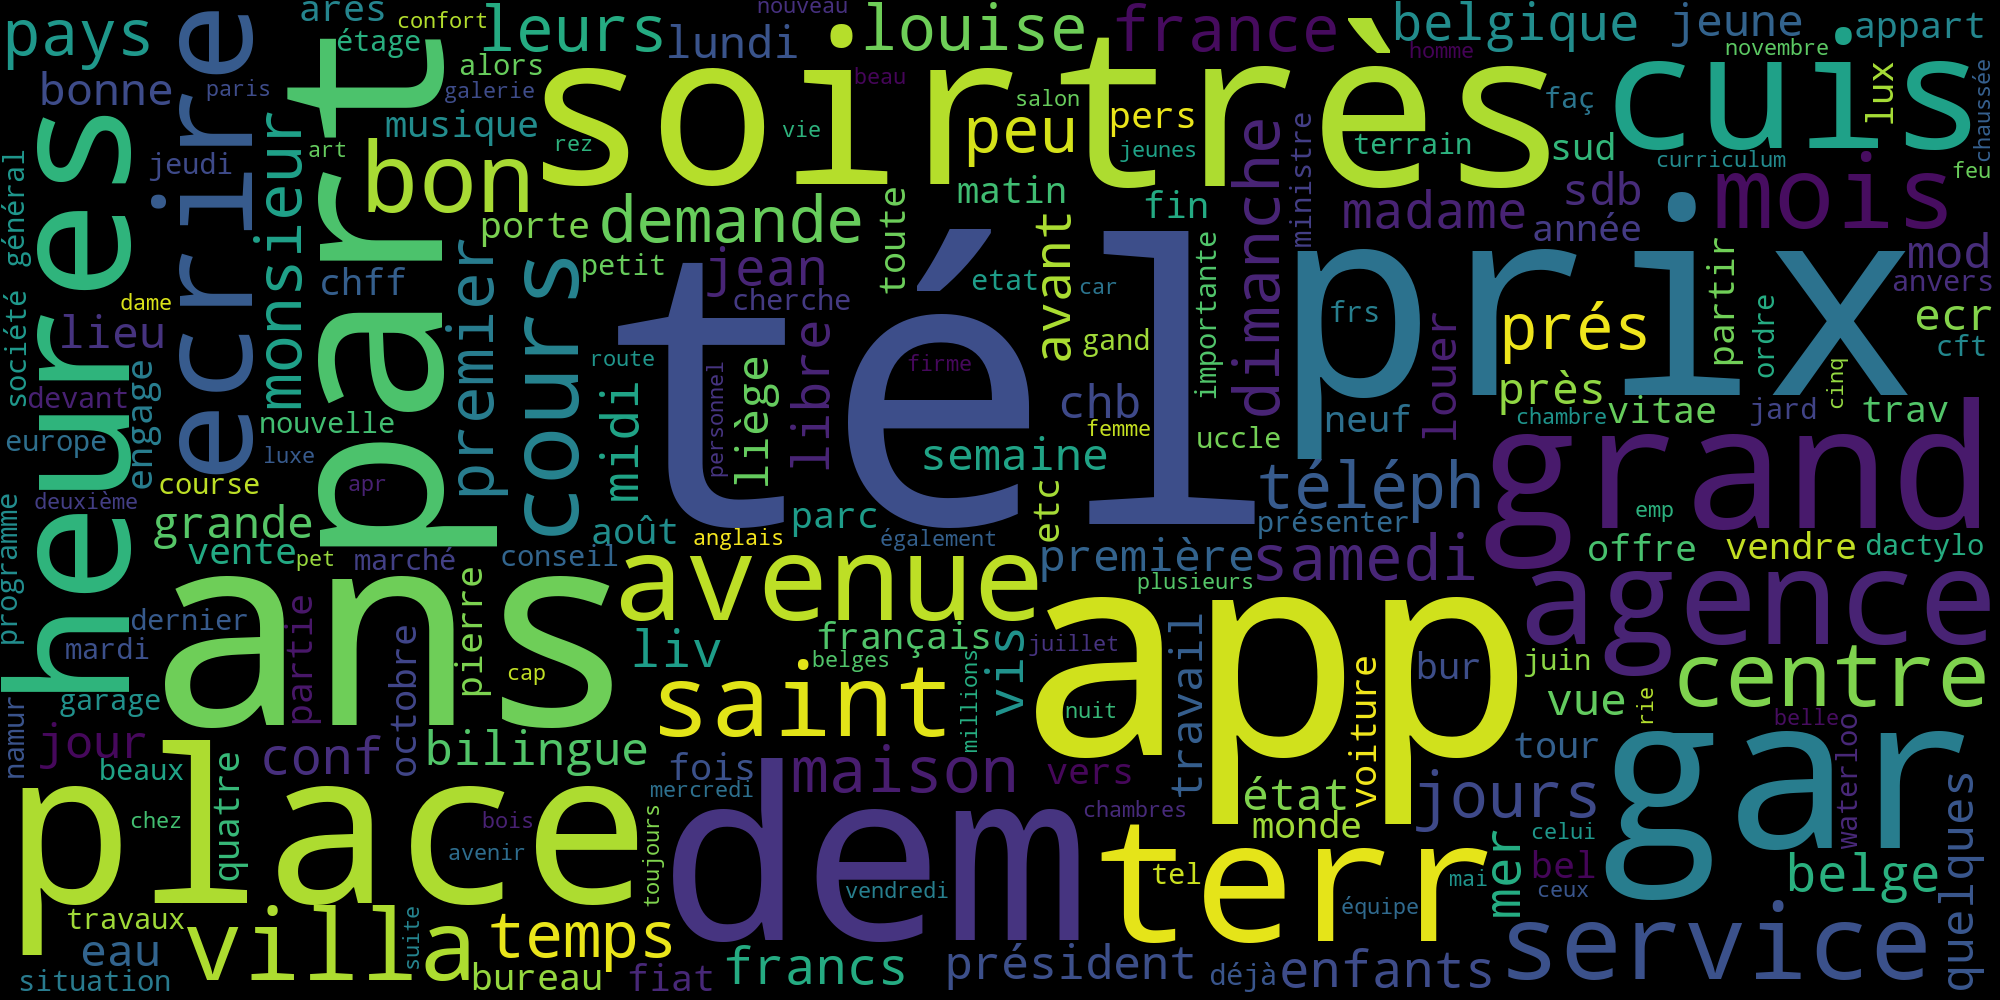

In [190]:
cloud = WordCloud(width=2000, height=1000, background_color='black').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))